In [1]:
from utils import KBpriceindex_preprocessing

In [11]:
import pandas as pd

In [2]:
price_index = KBpriceindex_preprocessing(path = 'KB_ts.xls', sheet_name='매매apt')
jeonse_index = KBpriceindex_preprocessing(path = 'KB_ts.xls', sheet_name='전세apt')

In [3]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [4]:
index_date = datetime(2010, 1, 1)
time_range = 12
# 작년 시간 데이터를 얻기 위해 12달을 빼줌
prev_date = index_date - relativedelta(months = time_range)

print(index_date)
print(prev_date)

price_index.loc[index_date]

2010-01-01 00:00:00
2009-01-01 00:00:00


전국    전국      78.0872
서울    서울      82.4551
      강북      84.2324
      강북구     88.8722
      광진구     80.5819
               ...   
경남    김해      66.2398
      통영         None
제주도   제주도        None
      서귀포     62.3361
기타지방  기타지방    74.3955
Name: 2010-01-01 00:00:00, Length: 186, dtype: object

$$\text{증감률} = \frac{현재 날짜 지수 값 - 이전 날짜 지수 값}{이전 날짜 지수 값}$$

In [9]:
((price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date])[:10]

전국  전국       0.0241779
서울  서울       0.0361481
    강북       0.0158269
    강북구    -0.00327966
    광진구      0.0219288
    노원구      0.0208965
    도봉구     0.00859785
    동대문구     0.0152782
    마포구      0.0533287
    서대문구    0.00679417
dtype: object

In [13]:
# index_date : 2010.1.1
# prev_date : 2009.1.1
demand_df = pd.DataFrame()
demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date]
demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date]
demand_df.head()

매매증감률      전세증감률
전국 전국    0.0241779  0.0623334
서울 서울    0.0361481   0.105536
   강북    0.0158269  0.0714128
   강북구 -0.00327966  0.0384684
   광진구   0.0219288   0.147834

In [14]:
# 2007.1.1(3년 전) ~ 2010.1.1까지 데이터 가져오기
prev_date2 = index_date - relativedelta(months=time_range*3)
price_index[prev_date2:index_date][:-1]

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
2007-01-01  74.1987  76.4686  72.4476   72.694  82.9614  67.5678  75.5409   
2007-02-01   74.421  76.7048  72.9047  73.6069  83.0809  68.0051  76.0995   
2007-03-01  74.4894  76.8294  73.1533    74.98  83.1532  68.2795  76.3485   
2007-04-01  74.4848  76.8227  73.4994  75.4657  83.0229   68.652  76.8593   
2007-05-01  74.4062  76.6678  73.6072  75.6458  82.5803  68.7983  77.0991   
2007-06-01  74.4313   76.709  73.7874  75.8986  82.4091  68.9726  77.4846   
2007-07-01  74.5543  76.9406  74.1779  76.8012  82.2568  69.3478  78.3285   
2007-08-01  74.6552  77.1018  74.4872  77.2621  82.3086  69.7241   79.167   
2007-09-01  74.7669  77.2707  74.8273  78.4527  82.4051  70.0852  79.4441   
2007-10-01  74.8861  77.4707  75.3178  79.0653   82.333  71.0292  79.7506   
2007-11-01  75.0016   77.715  75.9517  80.6774  82.3837  71.9055  80.2814   
2007-12-01  75.0318  77.8233  76.3214  82.0527  82.2811  72.6119  80.4105   
2008-01-01  75.1613  78.1992  77.0203  83.0142  82.3113  74.0462  80.9932   
2008-02-01  75.3307  78.6199  77.8128  83.9825  82.3211  75.8052  81.4985   
2008-03-01  75.7935  79.7079  79.7401   84.473  82.6312  80.0739  82.9654   
2008-04-01   76.529  81.2821  82.5034  87.7746  83.0118  85.1359  87.2162   
2008-05-01  76.9752  81.9682  83.6254  89.3358  83.3052  86.8669    88.62   
2008-06-01  77.3948  82.3885  84.3658  90.4202  83.3706   87.818  89.4998   
2008-07-01  77.6387   82.589  84.7752  90.9343  83.4147  88.2626  89.7854   
2008-08-01  77.7315  82.5824  84.8634  91.0563  83.4387  88.2629  89.9449   
2008-09-01  77.8973  82.5958  84.9736  91.1253  83.4241  88.2573  90.0771   
2008-10-01  77.8442  82.3458   84.898  91.1253  83.2476  88.1923  90.0015   
2008-11-01  77.4315  81.6508  84.5298  91.0356  82.3859  87.6785  89.5009   
2008-12-01  76.7583  80.3135  83.4655  89.4458  79.4238  86.2223  88.4567   
2009-01-01  76.2437  79.5785    82.92  89.1647  78.8527  85.3706  87.9603   
2009-02-01  76.0135   79.444  82.4016  88.7115  78.7059    84.18  87.4108   
2009-03-01  75.8325  79.2426  82.0765  88.1019   78.701  83.8442  85.9834   
2009-04-01  75.8681  79.5205  82.0403  87.9744  78.8597  83.6421  85.8307   
2009-05-01  75.9757  79.6575  82.0309  87.9354  78.7461  83.6097  85.6184   
2009-06-01  76.1485  80.0547  82.2763  87.8137  78.6676  84.0857  85.8781   
2009-07-01   76.406  80.7594  82.8225  87.8195  79.0395  85.2803  86.9957   
2009-08-01  76.6488  81.1724  83.1474  88.1706   79.327  85.8179  87.5883   
2009-09-01  77.2649  82.1346  83.9348  88.5674  79.9086  86.7822  88.5705   
2009-10-01  77.5797  82.4219  84.2413  88.7302  80.0155  87.2639  88.9522   
2009-11-01  77.8352  82.4046  84.2501  88.8162   80.481  87.2485  88.8228   
2009-12-01  77.9725   82.382  84.2467  88.8296  80.5038  87.2669  88.7777   

                                       ...    경남                             \
               동대문구      마포구     서대문구  ...   의창구      진해구       양산       거제   
2007-01-01  70.8263  73.5229  72.2348  ...  None  75.8594  63.5812  75.5766   
2007-02-01  71.1529  73.6085  72.7835  ...  None  75.9539  63.6276   75.853   
2007-03-01  71.2292  73.9485  73.0017  ...  None  75.7639  63.6314  76.0896   
2007-04-01  71.8841  74.0133  73.2341  ...  None  75.7864  63.3497  76.1322   
2007-05-01  72.1507  74.0294  73.2793  ...  None  75.8086  63.2774  76.3491   
2007-06-01  72.4353  73.9331  73.3007  ...  None  75.6535  63.1737  76.6137   
2007-07-01  73.0175  73.9117  73.8592  ...  None  75.5301  63.0831  76.7442   
2007-08-01  73.2446  73.9593  74.0375  ...  None  75.6036  63.1315  76.7529   
2007-09-01  73.5901  74.0849  74.2741  ...  None   75.561  62.9145  77.0169   
2007-10-01  74.0713  74.1536  74.6885  ...  None  75.4866   62.786  77.7444   
2007-11-01  74.9024  74.1972  75.3975  ...  None  75.4943  62.8695  77.8113   
2007-12-01  75.0692  74.2081  75.6666  ...  None  75.4556  62.8

In [15]:
demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값']

In [16]:
demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01

In [17]:
demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0

In [18]:
demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)
demand_df['수요총합'].unique()

array([4, 3, 2, 0, 1])

In [20]:
demand_df = demand_df[demand_df['수요총합'] == 4]
demand_df

매매증감률      전세증감률      이전최대값     최댓값대비증감률  매매가상승  전세가상승  \
전국    전국     0.0241779  0.0623334  77.972536   0.00147006   True   True   
서울    동대문구   0.0152782  0.0502244  81.585679   0.00132554   True   True   
      종로구    0.0338162  0.0552677  87.763135   0.00139849   True   True   
      강남     0.0531935   0.134123  80.941221  0.000815026   True   True   
      영등포구   0.0446273  0.0829252  77.730225   0.00269035   True   True   
6개광역시 6개광역시  0.0281944   0.047738  69.036974   0.00321103   True   True   
부산    부산     0.0674472  0.0729245  63.838859   0.00618849   True   True   
      중구      0.028688  0.0290584  78.862428  0.000339465   True   True   
      동래구    0.0520732  0.0671375  62.731047   0.00581427   True   True   
      북구     0.0758126    0.10479  62.441889    0.0098599   True   True   
      해운대구   0.0795261  0.0830501  65.242276   0.00969079   True   True   
      사하구    0.0744932  0.0866226  66.485535   0.00473662   True   True   
      금정구    0.0451898  0.0564354  66.986602   0.00393317   True   True   
      사상구    0.0801106  0.0972058  60.348896   0.00557983   True   True   
광주    남구     0.0156372  0.0425791  62.987446   0.00489902   True   True   
대전    대전     0.0678989   0.125325  74.231991   0.00611268   True   True   
      동구      0.065121  0.0971777  74.696181   0.00575688   True   True   
      중구     0.0411374  0.0809166  73.057171   0.00451369   True   True   
      서구     0.0958409   0.174832  74.793651     0.007916   True   True   
      유성구    0.0458221   0.140364  77.913834   0.00374076   True   True   
울산    울산     0.0284864  0.0412038  72.816333    0.0033062   True   True   
      동구     0.0102957  0.0281783  79.246544  9.47049e-07   True   True   
      북구     0.0509799  0.0642848  76.330267   0.00244306   True   True   
      울주군    0.0102078  0.0456995  67.101076  0.000204176   True   True   
5개광역시 5개광역시  0.0357605  0.0519436  63.906451   0.00403725   True   True   
충북    충북     0.0189221  0.0423643  71.373266    0.0021551   True   True   
      청주     0.0212533  0.0392217  71.384823   0.00191278   True   True   
      상당구    0.0362461  0.0452875  74.318468    0.0012174   True   True   
      흥덕구    0.0111294  0.0351658  69.913379   0.00239456   True   True   
전북    전북     0.0617632  0.0765946  77.924257   0.00403932   True   True   
      덕진구    0.0751552  0.0791137  74.446891   0.00366815   True   True   
      익산     0.0574571  0.0757243  79.263709   0.00475085   True   True   
전남    전남     0.0447284  0.0537103  78.865757   0.00587084   True   True   
      목포     0.0231574  0.0236567  71.511515   0.00229232   True   True   
      순천     0.0202299  0.0307448  84.143193   0.00671002   True   True   
      여수     0.0623136     0.0848  76.506255   0.00151169   True   True   
경남    경남     0.0332709  0.0443842  73.936273    0.0025693   True   True   
      창원     0.0367256  0.0459384  75.860842   0.00345604   True   True   
      양산     0.0136789  0.0514735  63.966163   0.00236649   True   True   
      거제      0.113989   0.114671  97.402669   0.00045411   True   True   
제주도   서귀포    0.0264182   0.030383  62.124924   0.00339988   True   True   
기타지방  기타지방   0.0271691  0.0369051  74.214664   0.00243614   True   True   

             더빠른전세상승  최댓값대비상승  수요총합  
전국    전국        True     True     4  
서울    동대문구      True     True     4  
      종로구       True     True     4  
      강남        True     True     4  
      영등포구      True     True     4  
6개광역시 6개광역시     True     True     4  
부산    부산        True     True     4  
      중구        True     True     4  
      동래구       True     True     4  
      북구        True     True     4  
      해운대구      True     True     4  
      사하구       True     True     4  
      금정구       True     True     4  
      사상구       True     True     4  
광주    남구        True     True     4  
대전    대전        True     True     4  
      동구        True     True     4  
      중구        True     True     4  
      서구        True     True     4  
      유성구       True     True  

In [21]:
demand_df.loc[[('서울','동대문구'), ('부산', '중구')]]

,,매매증감률,전세증감률,이전최대값,최댓값대비증감률,매매가상승,전세가상승,더빠른전세상승,최댓값대비상승,수요총합
서울,동대문구,0.0152782,0.0502244,81.585679,0.00132554,True,True,True,True,4
부산,중구,0.028688,0.0290584,78.862428,0.000339465,True,True,True,True,4


In [22]:
seleted_index = []

for name in demand_df.index:
    if name[0] is not name[1]:
        seleted_index.append((name[0], name[1]))
        
demand_df = demand_df.loc[seleted_index]

In [23]:
demand_df

매매증감률      전세증감률      이전최대값     최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
서울  동대문구  0.0152782  0.0502244  81.585679   0.00132554   True   True     True   
    종로구   0.0338162  0.0552677  87.763135   0.00139849   True   True     True   
    강남    0.0531935   0.134123  80.941221  0.000815026   True   True     True   
    영등포구  0.0446273  0.0829252  77.730225   0.00269035   True   True     True   
부산  중구     0.028688  0.0290584  78.862428  0.000339465   True   True     True   
    동래구   0.0520732  0.0671375  62.731047   0.00581427   True   True     True   
    북구    0.0758126    0.10479  62.441889    0.0098599   True   True     True   
    해운대구  0.0795261  0.0830501  65.242276   0.00969079   True   True     True   
    사하구   0.0744932  0.0866226  66.485535   0.00473662   True   True     True   
    금정구   0.0451898  0.0564354  66.986602   0.00393317   True   True     True   
    사상구   0.0801106  0.0972058  60.348896   0.00557983   True   True     True   
광주  남구    0.0156372  0.0425791  62.987446   0.00489902   True   True     True   
대전  동구     0.065121  0.0971777  74.696181   0.00575688   True   True     True   
    중구    0.0411374  0.0809166  73.057171   0.00451369   True   True     True   
    서구    0.0958409   0.174832  74.793651     0.007916   True   True     True   
    유성구   0.0458221   0.140364  77.913834   0.00374076   True   True     True   
울산  동구    0.0102957  0.0281783  79.246544  9.47049e-07   True   True     True   
    북구    0.0509799  0.0642848  76.330267   0.00244306   True   True     True   
    울주군   0.0102078  0.0456995  67.101076  0.000204176   True   True     True   
충북  청주    0.0212533  0.0392217  71.384823   0.00191278   True   True     True   
    상당구   0.0362461  0.0452875  74.318468    0.0012174   True   True     True   
    흥덕구   0.0111294  0.0351658  69.913379   0.00239456   True   True     True   
전북  덕진구   0.0751552  0.0791137  74.446891   0.00366815   True   True     True   
    익산    0.0574571  0.0757243  79.263709   0.00475085   True   True     True   
전남  목포    0.0231574  0.0236567  71.511515   0.00229232   True   True     True   
    순천    0.0202299  0.0307448  84.143193   0.00671002   True   True     True   
    여수    0.0623136     0.0848  76.506255   0.00151169   True   True     True   
경남  창원    0.0367256  0.0459384  75.860842   0.00345604   True   True     True   
    양산    0.0136789  0.0514735  63.966163   0.00236649   True   True     True   
    거제     0.113989   0.114671  97.402669   0.00045411   True   True     True   
제주도 서귀포   0.0264182   0.030383  62.124924   0.00339988   True   True     True   

          최댓값대비상승  수요총합  
서울  동대문구     True     4  
    종로구      True     4  
    강남       True     4  
    영등포구     True     4  
부산  중구       True     4  
    동래구      True     4  
    북구       True     4  
    해운대구     True     4  
    사하구      True     4  
    금정구      True     4  
    사상구      True     4  
광주  남구       True     4  
대전  동구       True     4  
    중구       True     4  
    서구       True     4  
    유성구      True     4  
울산  동구       True     4  
    북구       True     4  
    울주군      True     4  
충북  청주       True     4  
    상당구      True     4  
    흥덕구      True     4  
전북  덕진구      True     4  
    익산       True     4  
전남  목포       True     4  
    순천       True     4  
    여수       True     4  
경남  창원       True     4  
    양산       True     4  
    거제       True     4  
제주도 서귀포      True     4

In [24]:
def demand(price_index, jeonse_index, index_date, time_range):

    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)

    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/ price_index.loc[prev_date].replace(0,None)
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date])/jeonse_index.loc[prev_date].replace(0,None)
    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값'].replace(0,None)

    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)

    demand_df = demand_df[demand_df['수요총합'] == 4]

    seleted_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            seleted_index.append((name[0], name[1]))

    demand_df = demand_df.loc[seleted_index]
    
    return demand_df

In [25]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [26]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/Users/soohyunson/anaconda3/envs/py-env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


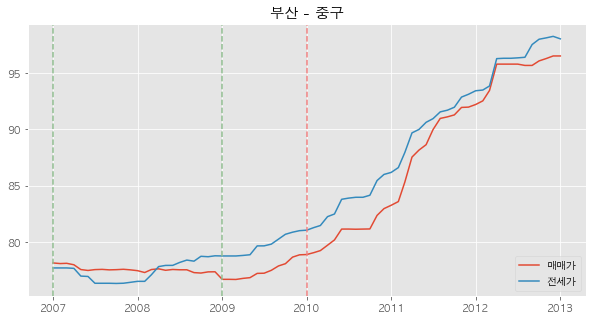

In [27]:
si = '부산'
gu = '중구'
index_date = datetime(2010, 1, 1)

prev_date = index_date - relativedelta(months=12)
prev_date2 = index_date - relativedelta(months=36)
graph_start = index_date - relativedelta(years=3)
graph_end = index_date + relativedelta(years=3)

plt.figure(figsize=(10, 5))
plt.title(si + ' - ' + gu)
plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
plt.axvline(x=index_date, color='lightcoral', linestyle='--')
plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
plt.legend()
plt.show()

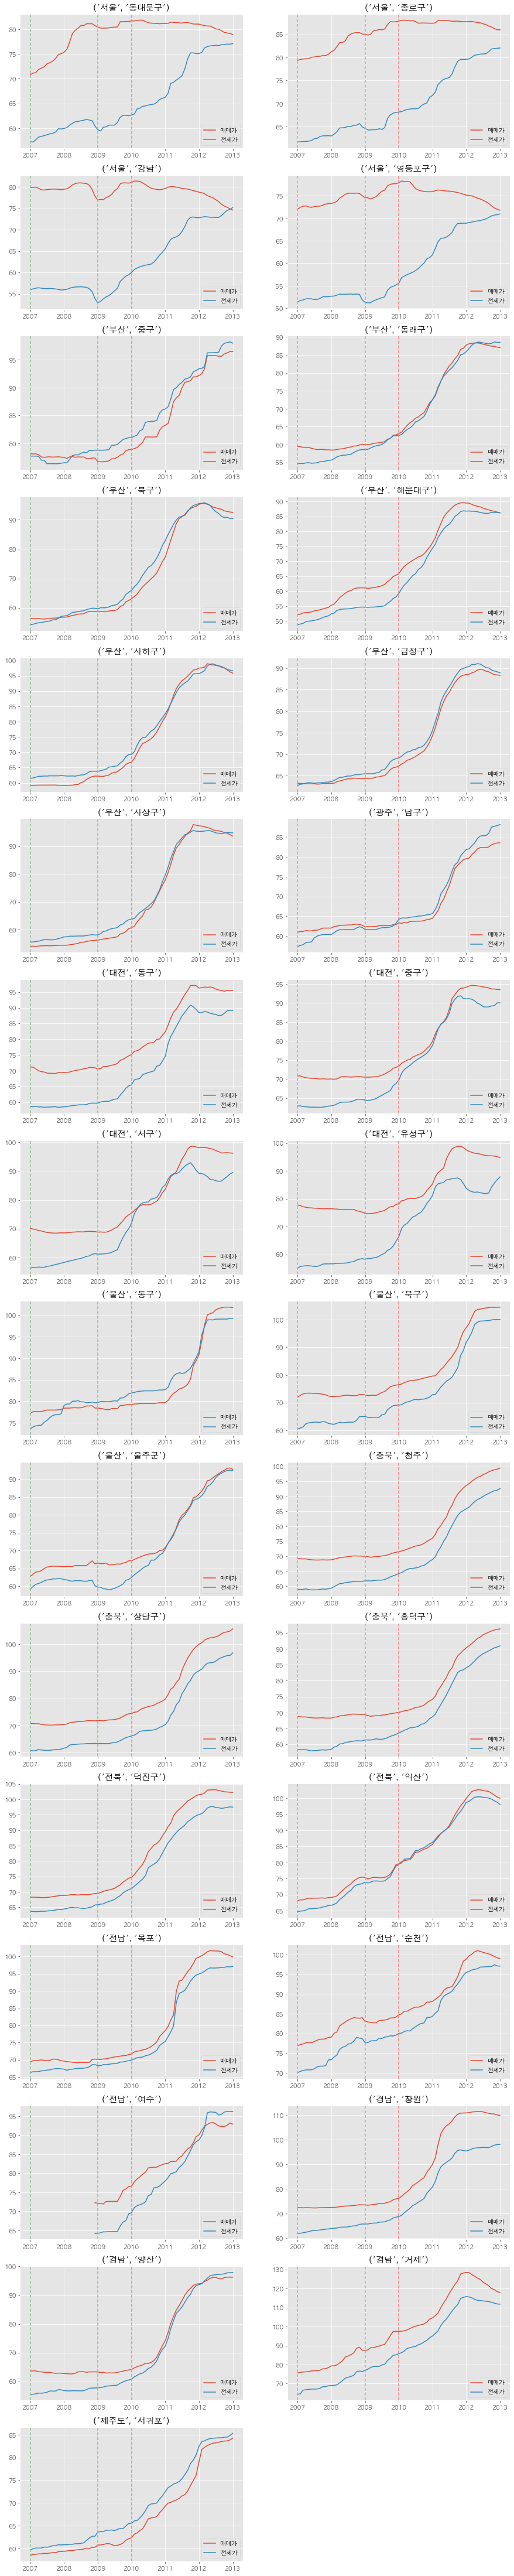

In [31]:
index_date = datetime(2010, 1, 1)

time_range = 12
prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months=time_range * 3)
graph_start = index_date - relativedelta(months=time_range * 3)
graph_end = index_date + relativedelta(months=time_range * 3)

num_row = int((len(demand_df.index)-1)/2)+1

plt.figure(figsize=(15, num_row*5))
for i, spot in enumerate(demand_df.index):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    si = spot[0]
    gu = spot[1]
    plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
    plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
    plt.axvline(x=index_date, color='lightcoral', linestyle='--')
    plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    plt.legend(loc='lower right')
    
plt.show()